Create a folder for the data/results:

In [9]:
import os

for path in [r'data/agglomerative_clustering', r'data/agglomerative_clustering_w_matrix_profiles']:
    if not os.path.isdir(path):
        os.makedirs(path)

#### Data import

The function **import_and_preprocess_ENERCOOP_load_profiles** beneath is used to transform the file **all_load_profiles.json** into a dataframe. Additionally, several date/time-related features are engineered (line 19-26). This function should only be used once to create the dataframe and export it as a parquet file.

In [2]:
#metSeason_dict: used to determine the meteorological season
metSeason_dict = \
    {item: 'Spring' for item in [3, 4, 5]} | \
    {item: 'Summer' for item in [6, 7, 8]} | \
    {item: 'Fall' for item in [9, 10, 11]} | \
    {item: 'Winter' for item in [12, 1, 2]}

#weekend_dict: used to determine whether or not a day is part of the weekend
weekend_dict = \
    {item: False for item in range(5)} | \
    {item: True for item in [5, 6]}


def import_and_preprocess_ENERCOOP_load_profiles(path):
    ENERCOOP_df = pd.read_json(path)
    ENERCOOP_df = pd.melt(ENERCOOP_df, id_vars = 'Date', value_vars = ENERCOOP_df.columns[1:].tolist(), var_name = 'Profile', value_name = 'Consumed energy [Wh]')
    ENERCOOP_df['Profile'] = ENERCOOP_df['Profile'].astype(int)
    ENERCOOP_df['Date'] = pd.to_datetime(ENERCOOP_df['Date'])
    ENERCOOP_df[[
            'Year',                         'Meteorological season',                                'Month',                                'Week of the year',
            'Day of the month',             'Weekday',                                              'Hour of the day',                      'Weekend'
    ]] = \
        pd.DataFrame([
            ENERCOOP_df['Date'].dt.year,    ENERCOOP_df['Date'].dt.month.replace(metSeason_dict),   ENERCOOP_df['Date'].dt.month_name(),    ENERCOOP_df['Date'].dt.isocalendar().week,
            ENERCOOP_df['Date'].dt.day,     ENERCOOP_df['Date'].dt.day_name(),                      ENERCOOP_df['Date'].dt.hour + 1,        ENERCOOP_df['Date'].dt.dayofweek.replace(weekend_dict)
        ]).T.values
    ENERCOOP_df = ENERCOOP_df[['Profile', 'Date'] + ENERCOOP_df.columns[3:].tolist() + ['Consumed energy [Wh]']]
    intCols = ['Profile', 'Year', 'Week of the year', 'Day of the month', 'Hour of the day']
    ENERCOOP_df[intCols] = ENERCOOP_df[intCols].astype(int)
    ENERCOOP_df['Weekend'] = ENERCOOP_df['Weekend'].astype('bool')
    return ENERCOOP_df

The code below creates and exports the parquet file. Enter the path to **all_load_profiles.json** and run the cell once. This cell can be skipped from then on or commented out.

In [2]:
import pandas as pd
path = r'C:/Users/FrancescaConselvan/Dropbox/MODERATE/Enercoop/all_load_profiles.json'
df = pd.read_json(path)
df

,Date,16,22,26,37,42,51,56,69,70,...,1163,1175,1193,1229,1231,1234,1272,1286,1298,1309
0,2021-06-01 01:00:00,734,0.0,49,88,0,329,116.0,9,0,...,33,43,0,126,59,292,121,207,12,113
1,2021-06-01 02:00:00,329,1.0,50,87,0,228,76.0,9,0,...,33,68,0,87,55,342,314,113,12,84
2,2021-06-01 03:00:00,164,1.0,50,35,0,181,77.0,9,0,...,33,39,0,87,54,221,162,108,12,133
3,2021-06-01 04:00:00,157,0.0,49,256,0,586,76.0,9,0,...,33,68,0,86,55,255,156,103,12,162
4,2021-06-01 05:00:00,255,1.0,49,85,0,179,76.0,9,0,...,33,39,0,92,54,198,108,102,13,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9475,2022-06-30 20:00:00,445,3.0,72,79,19,417,52.0,9,0,...,96,163,29,528,75,422,126,163,14,1164
9476,2022-06-30 21:00:00,367,2.0,50,79,0,834,58.0,23,0,...,64,81,12,601,88,274,127,251,14,1523
9477,2022-06-30 22:00:00,1439,2.0,47,80,0,357,81.0,34,0,...,128,46,0,436,127,199,85,1390,14,875
9478,2022-06-30 23:00:00,1414,2.0,70,388,0,355,59.0,21,0,...,94,82,0,535,119,394,128,475,14,385


In [3]:
path = r'C:/Users/FrancescaConselvan/Dropbox/MODERATE/Enercoop/all_load_profiles.json'
ENERCOOP_df = import_and_preprocess_ENERCOOP_load_profiles(path)
ENERCOOP_df.to_parquet(r'data/ENERCOOP_load_profiles.parquet.gzip', compression = 'gzip')

Once the **data** directory and the parquet file have been created the notebook can be started from here. In the cell below the ENERCOOP load profiles are imported and restructured.

In [5]:
import pandas as pd

ENERCOOP_df = pd.read_parquet(r'C:/Users/FrancescaConselvan/Dropbox/MODERATE/Enercoop/ENERCOOP_load_profiles.parquet.gzip')
ENERCOOP_df

,Profile,Date,Year,Meteorological season,Month,Week of the year,Day of the month,Weekday,Hour of the day,Weekend,Consumed energy [Wh]
0,16,2021-06-01 01:00:00,2021,Summer,June,22,1,Tuesday,2,False,734.0
1,16,2021-06-01 02:00:00,2021,Summer,June,22,1,Tuesday,3,False,329.0
2,16,2021-06-01 03:00:00,2021,Summer,June,22,1,Tuesday,4,False,164.0
3,16,2021-06-01 04:00:00,2021,Summer,June,22,1,Tuesday,5,False,157.0
4,16,2021-06-01 05:00:00,2021,Summer,June,22,1,Tuesday,6,False,255.0
...,...,...,...,...,...,...,...,...,...,...,...
3725635,1309,2022-06-30 20:00:00,2022,Summer,June,26,30,Thursday,21,False,1164.0
3725636,1309,2022-06-30 21:00:00,2022,Summer,June,26,30,Thursday,22,False,1523.0
3725637,1309,2022-06-30 22:00:00,2022,Summer,June,26,30,Thursday,23,False,875.0
3725638,1309,2022-06-30 23:00:00,2022,Summer,June,26,30,Thursday,24,False,385.0


In [6]:
energy_df = ENERCOOP_df.pivot_table(values = 'Consumed energy [Wh]', index = 'Profile', columns = ['Date', 'Meteorological season', 'Month', 'Day of the month', 'Hour of the day'])
energy_df

Date,2021-06-01 01:00:00,2021-06-01 02:00:00,2021-06-01 03:00:00,2021-06-01 04:00:00,2021-06-01 05:00:00,2021-06-01 06:00:00,2021-06-01 07:00:00,2021-06-01 08:00:00,2021-06-01 09:00:00,2021-06-01 10:00:00,...,2022-06-30 15:00:00,2022-06-30 16:00:00,2022-06-30 17:00:00,2022-06-30 18:00:00,2022-06-30 19:00:00,2022-06-30 20:00:00,2022-06-30 21:00:00,2022-06-30 22:00:00,2022-06-30 23:00:00,2022-07-01 00:00:00
Meteorological season,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,...,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer
Month,June,June,June,June,June,June,June,June,June,June,...,June,June,June,June,June,June,June,June,June,July
Day of the month,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,1
Hour of the day,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,1
Profile,,,,,,,,,,,,,,,,,,,,,
9,566.0,208.0,231.0,202.0,189.0,213.0,396.0,316.0,208.0,760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,15.0,15.0,14.0,15.0,15.0,14.0,15.0,18.0,14.0,15.0,...,53.0,61.0,312.0,55.0,79.0,69.0,60.0,58.0,247.0,286.0
15,312.0,312.0,303.0,300.0,297.0,531.0,328.0,280.0,507.0,407.0,...,803.0,390.0,388.0,395.0,391.0,336.0,379.0,770.0,680.0,1425.0
16,734.0,329.0,164.0,157.0,255.0,125.0,188.0,532.0,365.0,937.0,...,451.0,1598.0,912.0,220.0,211.0,445.0,367.0,1439.0,1414.0,739.0
22,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,503.0,101.0,2.0,3.0,2.0,2.0,2.0,3.0


Examine the dataframes:

In [5]:
display('ENERCOOP_df', ENERCOOP_df)
display('energy_df', energy_df)

'ENERCOOP_df'

,Profile,Date,Year,Meteorological season,Month,Week of the year,Day of the month,Weekday,Hour of the day,Weekend,Consumed energy [Wh]
0,16,2021-06-01 01:00:00,2021,Summer,June,22,1,Tuesday,2,False,734.0
1,16,2021-06-01 02:00:00,2021,Summer,June,22,1,Tuesday,3,False,329.0
2,16,2021-06-01 03:00:00,2021,Summer,June,22,1,Tuesday,4,False,164.0
3,16,2021-06-01 04:00:00,2021,Summer,June,22,1,Tuesday,5,False,157.0
4,16,2021-06-01 05:00:00,2021,Summer,June,22,1,Tuesday,6,False,255.0
...,...,...,...,...,...,...,...,...,...,...,...
3725635,1309,2022-06-30 20:00:00,2022,Summer,June,26,30,Thursday,21,False,1164.0
3725636,1309,2022-06-30 21:00:00,2022,Summer,June,26,30,Thursday,22,False,1523.0
3725637,1309,2022-06-30 22:00:00,2022,Summer,June,26,30,Thursday,23,False,875.0
3725638,1309,2022-06-30 23:00:00,2022,Summer,June,26,30,Thursday,24,False,385.0


'energy_df'

Date,2021-06-01 01:00:00,2021-06-01 02:00:00,2021-06-01 03:00:00,2021-06-01 04:00:00,2021-06-01 05:00:00,2021-06-01 06:00:00,2021-06-01 07:00:00,2021-06-01 08:00:00,2021-06-01 09:00:00,2021-06-01 10:00:00,...,2022-06-30 15:00:00,2022-06-30 16:00:00,2022-06-30 17:00:00,2022-06-30 18:00:00,2022-06-30 19:00:00,2022-06-30 20:00:00,2022-06-30 21:00:00,2022-06-30 22:00:00,2022-06-30 23:00:00,2022-07-01 00:00:00
Meteorological season,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,...,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer
Month,June,June,June,June,June,June,June,June,June,June,...,June,June,June,June,June,June,June,June,June,July
Day of the month,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,1
Hour of the day,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,1
Profile,,,,,,,,,,,,,,,,,,,,,
9,566.0,208.0,231.0,202.0,189.0,213.0,396.0,316.0,208.0,760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,15.0,15.0,14.0,15.0,15.0,14.0,15.0,18.0,14.0,15.0,...,53.0,61.0,312.0,55.0,79.0,69.0,60.0,58.0,247.0,286.0
15,312.0,312.0,303.0,300.0,297.0,531.0,328.0,280.0,507.0,407.0,...,803.0,390.0,388.0,395.0,391.0,336.0,379.0,770.0,680.0,1425.0
16,734.0,329.0,164.0,157.0,255.0,125.0,188.0,532.0,365.0,937.0,...,451.0,1598.0,912.0,220.0,211.0,445.0,367.0,1439.0,1414.0,739.0
22,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,2.0,503.0,101.0,2.0,3.0,2.0,2.0,2.0,3.0


#### Data preparation

Below, the data is normalized for the clustering procedure since the distance measures used in clustering are affected by the scale of the variables.

In [6]:
from sklearn.preprocessing import MinMaxScaler

energyNorm_df = energy_df.copy()
energyNorm_df[:] = MinMaxScaler().fit_transform(energy_df.T).T

Examine the normalized data:

In [7]:
display('energyNorm_df', energyNorm_df)

'energyNorm_df'

Date,2021-06-01 01:00:00,2021-06-01 02:00:00,2021-06-01 03:00:00,2021-06-01 04:00:00,2021-06-01 05:00:00,2021-06-01 06:00:00,2021-06-01 07:00:00,2021-06-01 08:00:00,2021-06-01 09:00:00,2021-06-01 10:00:00,...,2022-06-30 15:00:00,2022-06-30 16:00:00,2022-06-30 17:00:00,2022-06-30 18:00:00,2022-06-30 19:00:00,2022-06-30 20:00:00,2022-06-30 21:00:00,2022-06-30 22:00:00,2022-06-30 23:00:00,2022-07-01 00:00:00
Meteorological season,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,...,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer,Summer
Month,June,June,June,June,June,June,June,June,June,June,...,June,June,June,June,June,June,June,June,June,July
Day of the month,1,1,1,1,1,1,1,1,1,1,...,30,30,30,30,30,30,30,30,30,1
Hour of the day,2,3,4,5,6,7,8,9,10,11,...,16,17,18,19,20,21,22,23,24,1
Profile,,,,,,,,,,,,,,,,,,,,,
9,0.150292,0.055231,0.061338,0.053638,0.050186,0.056559,0.105151,0.083909,0.055231,0.201806,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14,0.003096,0.003096,0.002890,0.003096,0.003096,0.002890,0.003096,0.003715,0.002890,0.003096,...,0.010939,0.012590,0.064396,0.011352,0.016305,0.014241,0.012384,0.011971,0.050980,0.059030
15,0.097854,0.097854,0.093991,0.092704,0.091416,0.191845,0.104721,0.084120,0.181545,0.138627,...,0.308584,0.131330,0.130472,0.133476,0.131760,0.108155,0.126609,0.294421,0.255794,0.575536
16,0.092288,0.034874,0.011483,0.010491,0.024383,0.005954,0.014885,0.063652,0.039977,0.121066,...,0.052169,0.214772,0.117522,0.019422,0.018146,0.051318,0.040261,0.192231,0.188687,0.092997
22,0.000000,0.000654,0.000654,0.000000,0.000654,0.000000,0.000654,0.000654,0.000000,0.000654,...,0.001963,0.001309,0.329188,0.066099,0.001309,0.001963,0.001309,0.001309,0.001309,0.001963


#### Agglomerative Clustering

Below, hierarchical/agglomerative clustering is performed. First, the number of clusters is selected, then the clustering (encoded as a linkage matrix Z) is returned. In the last step, a dendrogram is plotted and exported to the **data** directory.

In [50]:
from scipy.cluster.hierarchy import linkage, dendrogram, maxdists, fcluster
import matplotlib.pyplot as plt

clusterCount = 11
Z = linkage(energyNorm_df, method = 'ward', optimal_ordering = True)
optDist = (maxdists(Z)[1 - clusterCount] + maxdists(Z)[- clusterCount])/2   #used for the horizontal line

plt.figure(figsize = (18, 12), facecolor = 'w')
dendrogram(Z, show_contracted = True)
plt.axhline(y = optDist, color = 'r', linestyle = 'dashed', label = f'Number of clusters = {clusterCount}')
plt.xticks([])
plt.ylabel('Cluster distance', fontsize = 16)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.savefig('data/agglomerative_clustering/Dendrogram.png')
plt.close()

The assigned cluster labels can be extracted from the linkage matrix with the **fcluster** function. We set the parameter **t** to the number of clusters we want and choose 'maxclust' as the criterion. This way, the dendrogram is cut off such that we get the desired number of clusters (alternatively, we could choose a distance for **t** and set the criterion to 'distance', this way we would get a number of clusters that matches a cut through the dendrogram at the specified distance). The output below is equal to **sklearn.cluster.AgglomerativeClustering().fit_predict(...)**, thus, we do not need sklearn.

In [51]:
labels = fcluster(Z, t = clusterCount, criterion = 'maxclust')

The function below is used to create heatmaps.

In [52]:
def plot_heatmap(df, title = None, use_monthly_xticks = True):
    fig = plt.figure(figsize = (10, 6), facecolor = 'w')
    sns.heatmap(df)
    plt.title(title, fontsize = 16)
    plt.xlabel('Month', fontsize = 16)
    if use_monthly_xticks:
        plt.xticks(ticks = np.arange(15, 365, 30), labels = df.columns.get_level_values(level = 0).unique(), fontsize = 12)
    plt.ylabel('Hour of the day', fontsize = 16)
    plt.yticks(fontsize = 12, rotation = 0)
    plt.tight_layout()
    plt.close()
    return fig

A heatmap is created for every cluster and exported to the **data** directory.

In [53]:
from tqdm.notebook import tqdm  #used for the progress bar
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

months = list(calendar.month_name)[1:]  #ordered list of months (January - December)

for label in tqdm(np.unique(labels)):
    tempCluster_df = energyNorm_df[labels == label].copy()  #filter out profiles by label
    tempCluster_df = tempCluster_df.melt().pivot_table(values = 'value', index = 'Hour of the day', columns = ['Month', 'Day of the month'])    #restructure dataframe
    tempCluster_df = tempCluster_df[months] #sort columns by month

    # Plot heatmaps
    title = f'Cluster Nr. {label}: {round(100*sum(labels == label)/len(labels), 2)} % of all profiles'
    fig = plot_heatmap(tempCluster_df, title)
    fig.savefig(f'data//agglomerative_clustering//Cluster_Nr_{label}.png')

  0%|          | 0/11 [00:00<?, ?it/s]

#### Agglomerative Clustering using Matrix Profiles

Instead of using the hourly 'Consumed energy' values directly, we can compute matrix profiles and use them to derive "vectors that store the (z-normalized) Euclidean distance between any subsequence within a time series and its nearest neighbor" (see https://stumpy.readthedocs.io/en/latest/Tutorial_The_Matrix_Profile.html). We essentially engineer new features and use them instead of the original ones in the clustering procedure.

The function **stumpy.stump** (or **stumpy.gpu_stump** if you want to use a gpu) already computes the z-normalized matrix profiles. The following code computes them, vertically stacks them (this creates a dataframe similar to 'energy_df' but with each row consisting of the smallest non-trivial distances instead of the energy values of a profile) and exports the dataframe:

In [16]:
from tqdm.notebook import tqdm
from stumpy import gpu_stump

matrixProfiles = []
for idx, row in tqdm(energy_df.iterrows()):
    matrixProfiles.append(gpu_stump(row, m = 24)[:, 0]) #m... window size

0it [00:00, ?it/s]

A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.
A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.


In [54]:
matrixProfile_arr = np.vstack(matrixProfiles)
matrixProfile_df = pd.DataFrame(matrixProfile_arr)
matrixProfile_df.index = energy_df.index
matrixProfile_df.columns = matrixProfile_df.columns.astype(str) #parquet must have string column names
matrixProfile_df.to_parquet(r'data/matrix_profiles.parquet.gzip', compression = 'gzip')

Once the matrix profile are calculated and exported, the section below can be used to import them instead of computing them again:

In [55]:
matrixProfile_df = pd.read_parquet(r'data/matrix_profiles.parquet.gzip')

Now we can, again, apply agglomerative clustering...

In [56]:
from scipy.cluster.hierarchy import linkage, dendrogram, maxdists, fcluster
import matplotlib.pyplot as plt

clusterCount = 11
Z_2 = linkage(matrixProfile_df, method = 'ward', optimal_ordering = True)
optDist = (maxdists(Z_2)[1 - clusterCount] + maxdists(Z_2)[- clusterCount])/2   #used for the horizontal line

plt.figure(figsize = (18, 12), facecolor = 'w')
dendrogram(Z_2, show_contracted = True)
plt.axhline(y = optDist, color = 'r', linestyle = 'dashed', label = f'Number of clusters = {clusterCount}')
plt.xticks([])
plt.ylabel('Cluster distance', fontsize = 16)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12)
plt.tight_layout()
plt.savefig('data/agglomerative_clustering_w_matrix_profiles/Dendrogram.png')
plt.close()

... and create a heatmap for every cluster:

In [61]:
labels_2 = fcluster(Z_2, t = clusterCount, criterion = 'maxclust')

In [62]:
from tqdm.notebook import tqdm  #used for the progress bar
import numpy as np
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

months = list(calendar.month_name)[1:]  #ordered list of months (January - December)

for label in tqdm(np.unique(labels_2)):
    tempCluster_df = energyNorm_df[labels_2 == label].copy()  #filter out profiles by label
    tempCluster_df = tempCluster_df.melt().pivot_table(values = 'value', index = 'Hour of the day', columns = ['Month', 'Day of the month'])    #restructure dataframe
    tempCluster_df = tempCluster_df[months] #sort columns by month

    # Plot heatmaps
    title = f'Cluster Nr. {label}: {round(100*sum(labels == label)/len(labels), 2)} % of all profiles'
    fig = plot_heatmap(tempCluster_df, title)
    fig.savefig(f'data//agglomerative_clustering_w_matrix_profiles//Cluster_Nr_{label}.png')

  0%|          | 0/11 [00:00<?, ?it/s]

#### Data synthesis

A GAN is used to create synthetic data. First, a cluster and a meteorological season are selected (since we want the data to be somewhat similar; also, using all at once is too computationally expensive). The dataframe is then converted into a numpy array and reshaped into a format ('day', 'hour', 'profile'). E.g. a shape of (90, 24, 62) means that there are 90 days, each with 24 hours, for each of the 62 selected profiles; this equals $90*24*60=129600$ values/data points. $\rightarrow$ Maybe check with Daniele if this is the correct way?

The labels from the agglomerative clustering (without matrix profiles) are used here.

For the **max_sequence_len**, 24 is chosen (such that a sequence equals the values of one day).

! Further experimenting with the parameters is needed, but very time consuming !

In [64]:
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType

clusterID = 9
metSeason = 'Winter'

cluster_df = energy_df.loc[labels == clusterID, energy_df.columns.get_level_values('Meteorological season') == metSeason].T  #filter by label and season
cluster_arr = cluster_df.to_numpy().reshape(-1, 24, cluster_df.shape[1])

model = DGAN(DGANConfig(
    max_sequence_len = cluster_arr.shape[1],
    sample_len = 1,
    apply_example_scaling = False,
    generator_learning_rate = 1e-4,
    discriminator_learning_rate = 1e-4,
    batch_size = cluster_arr.shape[0],
    epochs = 10000
))

The model is then trained:

In [65]:
model.train_numpy(
    cluster_arr,
    feature_types = [OutputType.CONTINUOUS]*cluster_arr.shape[2]
)

2023-02-05 19:57:45,078 : MainThread : INFO : epoch: 0
2023-02-05 19:57:48,751 : MainThread : INFO : epoch: 1
2023-02-05 19:57:48,869 : MainThread : INFO : epoch: 2
2023-02-05 19:57:49,011 : MainThread : INFO : epoch: 3
2023-02-05 19:57:49,138 : MainThread : INFO : epoch: 4
2023-02-05 19:57:49,249 : MainThread : INFO : epoch: 5
2023-02-05 19:57:49,383 : MainThread : INFO : epoch: 6
2023-02-05 19:57:49,500 : MainThread : INFO : epoch: 7
2023-02-05 19:57:49,618 : MainThread : INFO : epoch: 8
2023-02-05 19:57:49,756 : MainThread : INFO : epoch: 9
2023-02-05 19:57:49,884 : MainThread : INFO : epoch: 10
2023-02-05 19:57:50,007 : MainThread : INFO : epoch: 11
2023-02-05 19:57:50,134 : MainThread : INFO : epoch: 12
2023-02-05 19:57:50,263 : MainThread : INFO : epoch: 13
2023-02-05 19:57:50,377 : MainThread : INFO : epoch: 14
2023-02-05 19:57:50,503 : MainThread : INFO : epoch: 15
2023-02-05 19:57:50,631 : MainThread : INFO : epoch: 16
2023-02-05 19:57:50,755 : MainThread : INFO : epoch: 17
20

The trained model can be saved for later use...

In [73]:
model.save(f'data//agglomerative_clustering//Model_Cluster_Nr_{clusterID}_{metSeason}')

... and loaded:

In [74]:
model = DGAN.load(f'data//agglomerative_clustering//Model_Cluster_Nr_{clusterID}_{metSeason}')

Now, synthetic data can be generated. The 'cluster_arr.shape[0]' (which is 90 in this example) inside **generate_numpy** indicates that we want 90 days worth of data for each feature/profile. As I understand it right now, the code above generates multiple profiles for a single day and then joins them together, thus, an overall trend during the Winter period would be missed. Increasing the time intervall ('max_sequence_len' in the model initialization) leads to longer computation times.

In [75]:
_, synthetic_arr = model.generate_numpy(cluster_arr.shape[0])
synthetic_df = cluster_df.copy()
synthetic_df[:] = synthetic_arr.reshape(-1, cluster_df.shape[1])

Examine the synthetic data:

In [76]:
display(synthetic_df)

,,,,Profile,15,26,51,69,166,167,196,208,228,264,...,1218,1234,1256,1257,1274,1275,1276,1288,1309,1312
Date,Meteorological season,Month,Day of the month,Hour of the day,,,,,,,,,,,,,,,,,,,,,
2021-12-01 00:00:00,Winter,December,1,1,336.180939,32.276741,390.979675,12.451399,527.674988,1029.431519,623.415039,139.129990,279.262238,1105.248169,...,173.767303,1108.289795,333.519714,240.909851,87.372086,926.317078,1432.960815,94.432533,258.202087,618.125305
2021-12-01 01:00:00,Winter,December,1,2,252.243912,28.263157,217.946777,8.525635,252.559021,388.810364,335.517181,75.810402,127.241447,758.135132,...,29.995703,930.537048,84.309784,64.388428,133.071442,657.598083,282.242706,36.329758,122.938499,449.131470
2021-12-01 02:00:00,Winter,December,1,3,221.143265,29.530819,191.933228,7.370423,146.238068,227.357529,251.542206,70.733231,139.103973,544.577820,...,14.247334,413.077728,67.115128,257.870972,26.112762,209.513321,73.422874,30.210800,51.954227,433.631989
2021-12-01 03:00:00,Winter,December,1,4,214.219315,34.044140,153.525848,7.393863,96.452271,180.109818,181.084290,70.542259,98.289368,168.694977,...,9.939636,248.303192,63.696545,61.563522,44.238205,128.446045,60.959724,29.182049,72.816238,404.591553
2021-12-01 04:00:00,Winter,December,1,5,337.365967,43.382576,169.400909,8.727697,444.489685,74.466965,231.574341,72.664246,112.673950,122.408134,...,22.418903,660.508057,73.899284,36.727356,148.975754,967.166016,84.760193,29.418032,129.316208,416.030396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-28 19:00:00,Winter,February,28,20,467.459961,35.360367,330.700012,19.135094,155.844421,76.587357,1330.762939,199.234573,248.412201,100.719376,...,170.988678,450.267731,209.980957,55.216492,824.291199,594.606384,57.476040,519.512695,751.131470,578.306641
2022-02-28 20:00:00,Winter,February,28,21,469.133026,34.310326,477.209198,51.867882,438.661743,1938.663330,686.646362,195.130737,267.875793,1384.688477,...,681.981873,284.795044,376.525726,127.301064,1291.884766,750.489075,643.927124,662.370972,1427.303833,2109.416016
2022-02-28 21:00:00,Winter,February,28,22,346.599396,37.602654,826.732727,50.940292,377.458679,845.203064,881.285217,143.646729,401.867310,2144.501953,...,932.282166,150.747864,1212.005493,1767.548218,160.404053,656.033569,130.018097,600.880249,213.745499,1882.881836


Plot and examine the correlations between the repsective columns/profiles of 'cluster_df' and 'synthetic_df':

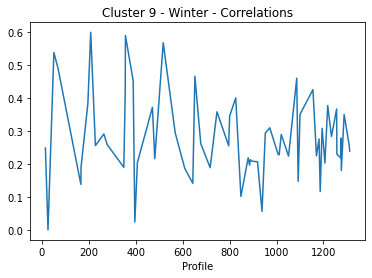

In [87]:
cluster_df.corrwith(synthetic_df, axis = 0).plot()
plt.title(f'Cluster {clusterID} - {metSeason} - Correlations')
plt.savefig(f'data//agglomerative_clustering//Cluster_Nr_{clusterID}_Winter_Correlations.png')
plt.show()

Take a look at the heatmaps of 'cluster_df' and 'synthetic_df':

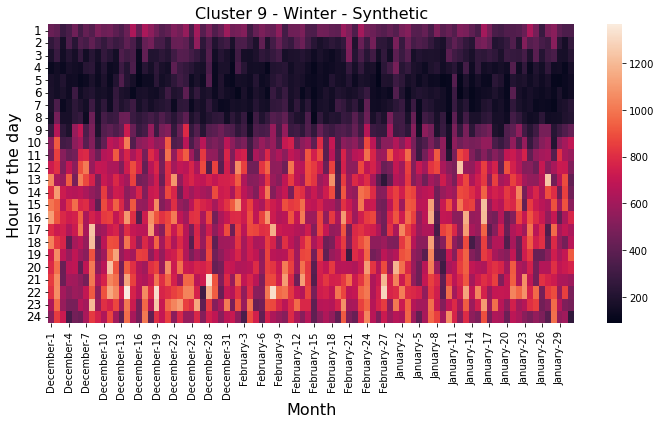

In [85]:
heatmapSynthetic_df = synthetic_df.T.melt().pivot_table(values = 'value', index = 'Hour of the day', columns = ['Month', 'Day of the month'])
fig = plot_heatmap(heatmapSynthetic_df, title = f'Cluster {clusterID} - {metSeason} - Synthetic', use_monthly_xticks = False)
fig.savefig(f'data//agglomerative_clustering//Cluster_Nr_{clusterID}_{metSeason}_Synthetic.png')
fig

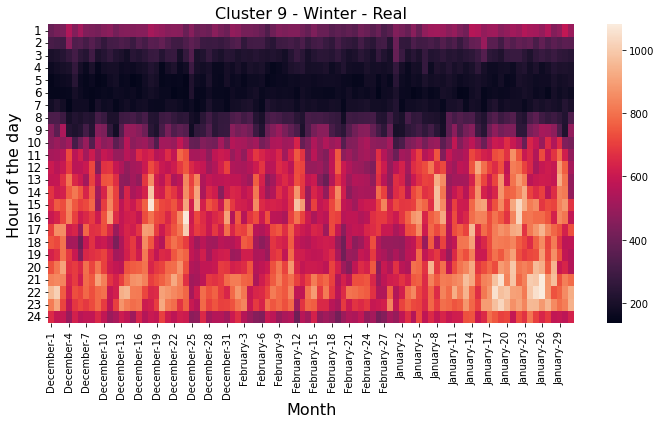

In [84]:
heatmapCluster_df = cluster_df.T.melt().pivot_table(values = 'value', index = 'Hour of the day', columns = ['Month', 'Day of the month'])
fig = plot_heatmap(heatmapCluster_df, title = f'Cluster {clusterID} - {metSeason} - Real', use_monthly_xticks = False)
fig.savefig(f'data//agglomerative_clustering//Cluster_Nr_{clusterID}_{metSeason}_Real.png')
fig